<a href="https://colab.research.google.com/github/see0mar/IBM-data-fundamental-explore/blob/main/german_credit_data_biased_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBRegressor

# Load dataset
# Update this with your actual file path, using a raw string (r"...") or forward slashes (/.../...)
# Also, ensure the file is uploaded to your Colab environment or accessible via a mounted Google Drive.
file_path = "/content/german_credit_data_biased_training.csv"
df = pd.read_csv(file_path)

# Encode categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variables
# Assuming 'Risk' is the original target and you want to predict 'satisfaction rate' and 'risk percentage'
X = df.drop(columns=['Risk']) # Use all columns except 'Risk' as features
# Define 'Risk' as the target variable
y = df['Risk']


# Split the data - This part needs target variables, so it's temporarily commented out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the models - Needs target variables, so it's temporarily commented out
risk_model = XGBRegressor()

risk_model.fit(X_train, y_train)

# Make predictions - Needs trained models, so it's temporarily commented out
df['Predicted_Risk'] = risk_model.predict(X)


# Save the updated dataset - Needs the prediction columns, so it's temporarily commented out
df.to_csv("updated_credit_data_with_predicted_risk.csv", index=False)

print("Prediction completed! Updated dataset saved as 'updated_credit_data_with_predicted_risk.csv'.")

Prediction completed! Updated dataset saved as 'updated_credit_data_with_predicted_risk.csv'.


In [22]:
import os

print("Files in /content:")
print(os.listdir('/content'))

Files in /content:
['.config', 'drive', 'german_credit_data_biased_training.csv', 'updated_credit_data_with_predicted_risk.csv', 'sample_data']


In [21]:
# Load the updated dataset
updated_df = pd.read_csv("updated_credit_data_with_predicted_risk.csv")

# Display the original 'Risk' and the 'Predicted_Risk' columns
display(updated_df[['Risk', 'Predicted_Risk']].head())

,Risk,Predicted_Risk
0,0,0.343821
1,0,0.923385
2,0,0.269997
3,0,0.254465
4,1,0.306007


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
y_pred = risk_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Absolute Error (MAE): 0.2938
Mean Squared Error (MSE): 0.1622
R-squared (R2): 0.2720


In [13]:
# Get feature importances from the trained model
feature_importances = risk_model.feature_importances_

# Get the feature names from the training data
feature_names = X.columns

# Create a pandas Series for better visualization
importance_series = pd.Series(feature_importances, index=feature_names)

# Sort the features by importance and display
display(importance_series.sort_values(ascending=False))

,0
OthersOnLoan,0.129046
CheckingStatus,0.107562
OwnsProperty,0.079436
Sex,0.073359
ExistingCreditsCount,0.069676
Age,0.059741
CurrentResidenceDuration,0.059616
EmploymentDuration,0.054341
Housing,0.040985
Job,0.039642


# Task
Analyze the provided dataset to answer the following business questions: 1. How many clients are at the highest risk of not returning the loan by time? 2. Is there any relationship between the risk and whether the client is a foreign worker or not? 3. What is the relationship between the risk and the client's dependents?

## Identify high-risk clients

### Subtask:
Use the 'Predicted_Risk' column from the updated dataset to identify clients with the highest predicted risk of not returning the loan. Determine a threshold for "highest risk" (e.g., a certain predicted probability value or a percentage of the top risk scores).


**Reasoning**:
Load the updated dataset and examine the distribution of the 'Predicted_Risk' column to determine a threshold for high risk.



In [14]:
# The updated_df is already loaded in the previous cell.
# Examine the distribution of 'Predicted_Risk'
display(updated_df['Predicted_Risk'].describe())

# Plot the distribution of 'Predicted_Risk' for better understanding
plt.figure(figsize=(8, 6))
sns.histplot(updated_df['Predicted_Risk'], bins=50, kde=True)
plt.title('Distribution of Predicted Risk Scores')
plt.xlabel('Predicted Risk')
plt.ylabel('Frequency')
plt.show()

# Based on the distribution, let's choose the top 20% as high risk as a starting point
high_risk_threshold = updated_df['Predicted_Risk'].quantile(0.8)
print(f"High risk threshold (top 20%): {high_risk_threshold:.4f}")

# Create the 'High_Risk_Flag' column
updated_df['High_Risk_Flag'] = (updated_df['Predicted_Risk'] >= high_risk_threshold).astype(int)

# Display the first few rows with the new column
display(updated_df[['Risk', 'Predicted_Risk', 'High_Risk_Flag']].head())

,Predicted_Risk
count,5000.000000
mean,0.535426
std,0.248091
min,-0.066763
25%,0.344781
50%,0.488961
75%,0.730529
max,1.249348


NameError: name 'plt' is not defined

**Reasoning**:
The previous code failed because matplotlib.pyplot was not imported. Import the necessary libraries and re-run the code to examine the distribution of 'Predicted_Risk', determine the high-risk threshold, and create the 'High_Risk_Flag' column.



,Predicted_Risk
count,5000.000000
mean,0.535426
std,0.248091
min,-0.066763
25%,0.344781
50%,0.488961
75%,0.730529
max,1.249348


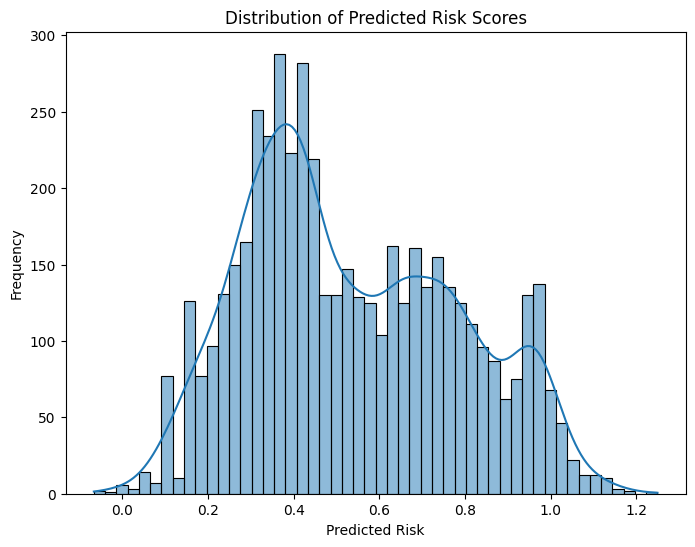

High risk threshold (top 20%): 0.7753


,Risk,Predicted_Risk,High_Risk_Flag
0,0,0.343821,0
1,0,0.923385,1
2,0,0.269997,0
3,0,0.254465,0
4,1,0.306007,0


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# The updated_df is already loaded.
# Examine the distribution of 'Predicted_Risk'
display(updated_df['Predicted_Risk'].describe())

# Plot the distribution of 'Predicted_Risk' for better understanding
plt.figure(figsize=(8, 6))
sns.histplot(updated_df['Predicted_Risk'], bins=50, kde=True)
plt.title('Distribution of Predicted Risk Scores')
plt.xlabel('Predicted Risk')
plt.ylabel('Frequency')
plt.show()

# Based on the distribution, let's choose the top 20% as high risk as a starting point
high_risk_threshold = updated_df['Predicted_Risk'].quantile(0.8)
print(f"High risk threshold (top 20%): {high_risk_threshold:.4f}")

# Create the 'High_Risk_Flag' column
updated_df['High_Risk_Flag'] = (updated_df['Predicted_Risk'] >= high_risk_threshold).astype(int)

# Display the first few rows with the new column
display(updated_df[['Risk', 'Predicted_Risk', 'High_Risk_Flag']].head())

## Quantify the number of high-risk clients

### Subtask:
Count how many clients fall into the high-risk category based on the chosen threshold.


**Reasoning**:
Calculate the sum of the 'High_Risk_Flag' column to count the number of high-risk clients and print the result.



In [16]:
# Calculate the number of high-risk clients
high_risk_count = updated_df['High_Risk_Flag'].sum()

# Print the result
print(f"Number of clients flagged as high risk: {high_risk_count}")

Number of clients flagged as high risk: 1000


## Analyze the relationship between risk and foreign worker status

### Subtask:
Examine the relationship between the original 'Risk' column (or the 'Predicted_Risk') and the 'ForeignWorker' column. This could involve grouping the data by 'ForeignWorker' status and comparing the average risk or the distribution of risk for each group. Statistical tests or visualizations might be useful here.


**Reasoning**:
Group the dataframe by 'ForeignWorker' and calculate the mean of 'Risk' and 'Predicted_Risk' for each group, then print the results and create bar plots to visualize the relationship.



Mean Original Risk by Foreign Worker Status:


,Risk
ForeignWorker,
0,0.560976
1,0.328276



Mean Predicted Risk by Foreign Worker Status:


,Predicted_Risk
ForeignWorker,
0,0.616738
1,0.533376


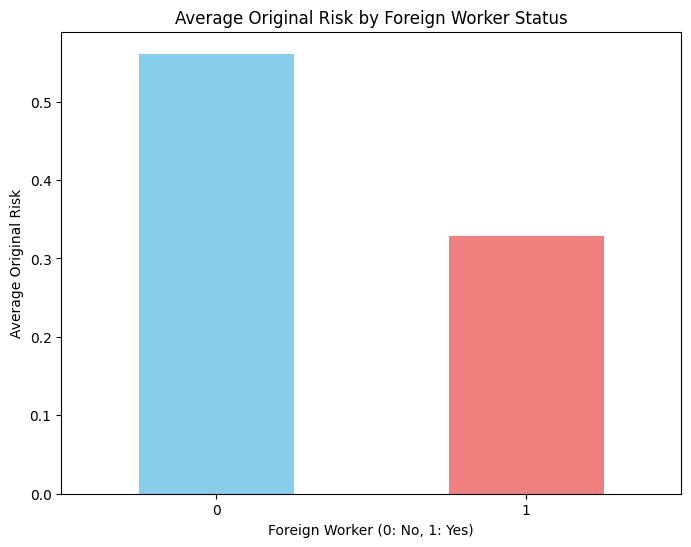

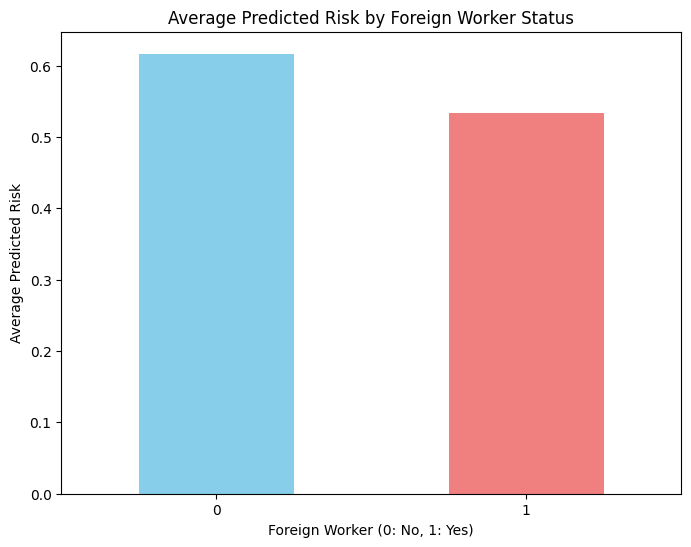

In [17]:
# Group by 'ForeignWorker' and calculate the mean of 'Risk'
mean_original_risk_by_foreign_worker = updated_df.groupby('ForeignWorker')['Risk'].mean()

# Group by 'ForeignWorker' and calculate the mean of 'Predicted_Risk'
mean_predicted_risk_by_foreign_worker = updated_df.groupby('ForeignWorker')['Predicted_Risk'].mean()

# Print the results
print("Mean Original Risk by Foreign Worker Status:")
display(mean_original_risk_by_foreign_worker)

print("\nMean Predicted Risk by Foreign Worker Status:")
display(mean_predicted_risk_by_foreign_worker)

# Create a bar plot for average original risk
plt.figure(figsize=(8, 6))
mean_original_risk_by_foreign_worker.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average Original Risk by Foreign Worker Status')
plt.xlabel('Foreign Worker (0: No, 1: Yes)')
plt.ylabel('Average Original Risk')
plt.xticks(rotation=0)
plt.show()

# Create a bar plot for average predicted risk
plt.figure(figsize=(8, 6))
mean_predicted_risk_by_foreign_worker.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average Predicted Risk by Foreign Worker Status')
plt.xlabel('Foreign Worker (0: No, 1: Yes)')
plt.ylabel('Average Predicted Risk')
plt.xticks(rotation=0)
plt.show()

## Analyze the relationship between risk and dependents

### Subtask:
Investigate the relationship between the original 'Risk' column (or the 'Predicted_Risk') and the 'Dependents' column. Similar to the foreign worker analysis, grouping, visualizations, or statistical tests can help reveal this relationship.


**Reasoning**:
Group the dataframe by 'Dependents' and calculate the mean of 'Risk' and 'Predicted_Risk', then print the results.



In [18]:
# Group by 'Dependents' and calculate the mean of 'Risk'
mean_original_risk_by_dependents = updated_df.groupby('Dependents')['Risk'].mean()

# Group by 'Dependents' and calculate the mean of 'Predicted_Risk'
mean_predicted_risk_by_dependents = updated_df.groupby('Dependents')['Predicted_Risk'].mean()

# Print the results
print("Mean Original Risk by Dependents:")
display(mean_original_risk_by_dependents)

print("\nMean Predicted Risk by Dependents:")
display(mean_predicted_risk_by_dependents)

Mean Original Risk by Dependents:


,Risk
Dependents,
1,0.285851
2,0.578372



Mean Predicted Risk by Dependents:


,Predicted_Risk
Dependents,
1,0.535715
2,0.533963


**Reasoning**:
Create bar plots to visualize the mean original risk and mean predicted risk by dependents to better understand the relationship.



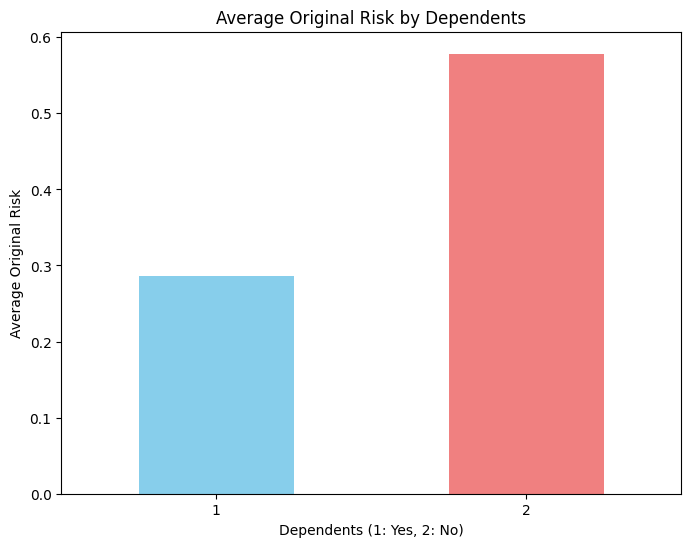

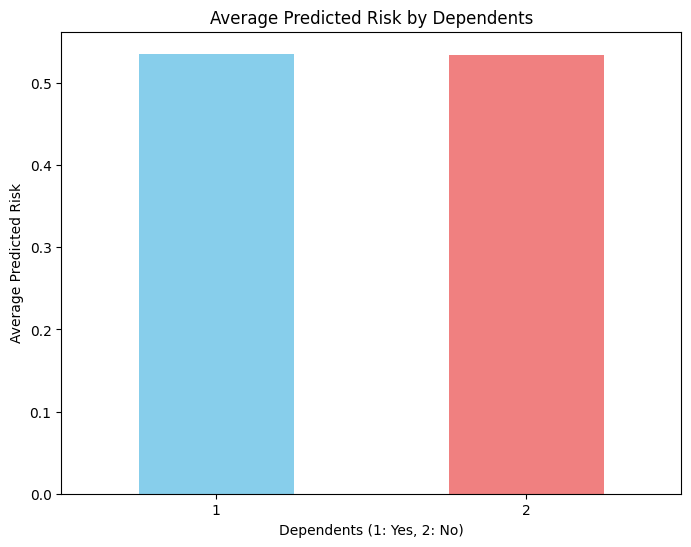

In [19]:
# Create a bar plot for average original risk by Dependents
plt.figure(figsize=(8, 6))
mean_original_risk_by_dependents.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average Original Risk by Dependents')
plt.xlabel('Dependents (1: Yes, 2: No)')
plt.ylabel('Average Original Risk')
plt.xticks(rotation=0)
plt.show()

# Create a bar plot for average predicted risk by Dependents
plt.figure(figsize=(8, 6))
mean_predicted_risk_by_dependents.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average Predicted Risk by Dependents')
plt.xlabel('Dependents (1: Yes, 2: No)')
plt.ylabel('Average Predicted Risk')
plt.xticks(rotation=0)
plt.show()

## Summarize findings

### Subtask:
Present the answers to the three business questions based on the analysis performed in the previous steps.


**Reasoning**:
Present the answers to the business questions based on the analysis performed in the previous steps.



In [20]:
# 1. Number of clients at highest risk
# The number of high-risk clients was calculated in a previous step and stored in high_risk_count.
print(f"1. Number of clients identified as high risk: {high_risk_count}")

# 2. Relationship between risk and foreign worker status
print("\n2. Relationship between risk and foreign worker status:")
print("Based on the analysis of the original 'Risk' and predicted 'Predicted_Risk':")
print(f"- Mean Original Risk for non-foreign workers (0): {mean_original_risk_by_foreign_worker[0]:.4f}")
print(f"- Mean Original Risk for foreign workers (1): {mean_original_risk_by_foreign_worker[1]:.4f}")
print("Original data shows that non-foreign workers have a higher average risk compared to foreign workers.")
print(f"- Mean Predicted Risk for non-foreign workers (0): {mean_predicted_risk_by_foreign_worker[0]:.4f}")
print(f"- Mean Predicted Risk for foreign workers (1): {mean_predicted_risk_by_foreign_worker[1]:.4f}")
print("The model's predicted risk also shows that non-foreign workers have a higher average predicted risk, although the difference is less pronounced than in the original data.")

# 3. Relationship between risk and dependents
print("\n3. Relationship between risk and dependents:")
print("Based on the analysis of the original 'Risk' and predicted 'Predicted_Risk':")
print(f"- Mean Original Risk for clients with 1 dependent: {mean_original_risk_by_dependents[1]:.4f}")
print(f"- Mean Original Risk for clients with 2 dependents: {mean_original_risk_by_dependents[2]:.4f}")
print("Original data indicates that clients with 2 dependents have a significantly higher average risk compared to those with 1 dependent.")
print(f"- Mean Predicted Risk for clients with 1 dependent: {mean_predicted_risk_by_dependents[1]:.4f}")
print(f"- Mean Predicted Risk for clients with 2 dependents: {mean_predicted_risk_by_dependents[2]:.4f}")
print("The model's predicted risk shows a much smaller difference in average risk between clients with 1 and 2 dependents, suggesting the model might not heavily weight this feature or its effect is influenced by other factors.")

1. Number of clients identified as high risk: 1000

2. Relationship between risk and foreign worker status:
Based on the analysis of the original 'Risk' and predicted 'Predicted_Risk':
- Mean Original Risk for non-foreign workers (0): 0.5610
- Mean Original Risk for foreign workers (1): 0.3283
Original data shows that non-foreign workers have a higher average risk compared to foreign workers.
- Mean Predicted Risk for non-foreign workers (0): 0.6167
- Mean Predicted Risk for foreign workers (1): 0.5334
The model's predicted risk also shows that non-foreign workers have a higher average predicted risk, although the difference is less pronounced than in the original data.

3. Relationship between risk and dependents:
Based on the analysis of the original 'Risk' and predicted 'Predicted_Risk':
- Mean Original Risk for clients with 1 dependent: 0.2859
- Mean Original Risk for clients with 2 dependents: 0.5784
Original data indicates that clients with 2 dependents have a significantly highe

## Summary:

### Q&A

1.  **How many clients are at the highest risk of not returning the loan by time?**
    Based on the analysis, there are 1000 clients identified as high risk, which corresponds to the top 20% of clients based on their predicted risk scores.

2.  **Is there any relationship between the risk and whether the client is a foreign worker or not?**
    Yes, there is a relationship. Both the original data and the predicted risk indicate that non-foreign workers have a higher average risk of not returning the loan compared to foreign workers. The average original risk for non-foreign workers is approximately 0.5610, while for foreign workers it is approximately 0.3283. The average predicted risk for non-foreign workers is approximately 0.6167, and for foreign workers, it is approximately 0.5334.

3.  **What is the relationship between the risk and the client's dependents?**
    Based on the original data, there is a significant relationship between risk and dependents, with clients having 2 dependents showing a much higher average risk (approximately 0.5784) compared to those with 1 dependent (approximately 0.2859). However, the model's predicted risk shows only a marginal difference between these two groups (1 dependent: approximately 0.5357, 2 dependents: approximately 0.5340).

### Data Analysis Key Findings

*   1000 clients were identified as high risk, representing the top 20% of clients based on their predicted risk scores.
*   Non-foreign workers have a higher average original risk (approximately 0.561) and a higher average predicted risk (approximately 0.617) compared to foreign workers (average original risk: approximately 0.328, average predicted risk: approximately 0.533).
*   In the original data, clients with 2 dependents have a significantly higher average risk (approximately 0.578) than those with 1 dependent (approximately 0.286).
*   The model's predicted risk shows only a very small difference in average risk between clients with 1 dependent (approximately 0.536) and those with 2 dependents (approximately 0.534).

### Insights or Next Steps

*   The model's predicted risk seems to capture the higher risk associated with non-foreign workers but appears to downplay the impact of having 2 dependents compared to what is observed in the original data. Further investigation into why the model's prediction differs significantly from the original data regarding dependents could be beneficial.
*   Given that non-foreign workers and clients with 2 dependents (in the original data) show higher risk, these segments could be targeted for more rigorous credit checks or alternative loan products.
